In [1]:
import os
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

In [2]:
screenshots_path = "traffic_sim/screenshots/"
labels_path = "traffic_sim/labels/"

screenshots_list = list(map(lambda x: screenshots_path+x, os.listdir(screenshots_path)))
labels_list = list(map(lambda x: labels_path+x,os.listdir(labels_path)))

In [19]:
index = 100

In [20]:
sample_labels_path = labels_list[index]
sample_labels_path

'traffic_sim/labels/screenshot_20241221-122718_placeholder_inverted.txt'

In [21]:
image = sample_labels_path.split("/")[-1][:-25]
sample_image_path = os.path.join(screenshots_path,image+".png")
sample_image_path

'traffic_sim/screenshots/screenshot_20241221-122718.png'

In [23]:
labels = []
with open(sample_labels_path, "r") as f:
    for x in f: 
        str_labels = x.split(" ")
        str_labels[-1] = str_labels[-1][:-1]
        str_labels = list(map(lambda x: float(x), str_labels))
        str_labels[0] = int(str_labels[0]) 
        labels.append(str_labels)

In [24]:
# Classes 
ids_to_classes = {
    0: "bike",
    1: "bus",
    2: "car",
    3: "truck"
}

ids_to_colors = {
    0: (255,0,0),
    1: (0,255,255),
    2: (0,255,0),
    3: (255,255,0)
}

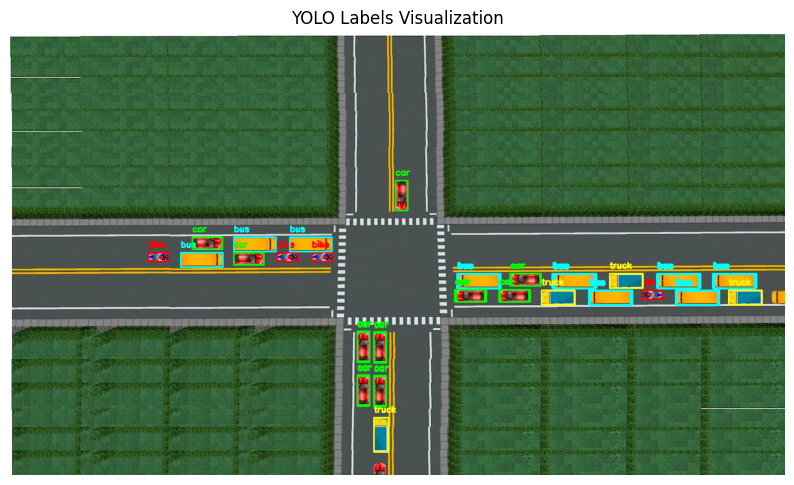

In [25]:
# Load the image
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Image dimensions
image_height, image_width, _ = image.shape

# Plot labels on the image
for label in labels:
    class_id, x_center, y_center, width, height = label
    
    # Convert normalized coordinates back to pixel values
    x_center_pixel = int(x_center * image_width)
    y_center_pixel = int(y_center * image_height)
    width_pixel = int(width * image_width)
    height_pixel = int(height * image_height)
    
    # Calculate top-left and bottom-right coordinates
    top_left = (x_center_pixel - width_pixel // 2, y_center_pixel - height_pixel // 2)
    bottom_right = (x_center_pixel + width_pixel // 2, y_center_pixel + height_pixel // 2)
    
    # Draw the rectangle
    cv2.rectangle(image, top_left, bottom_right, ids_to_colors[class_id], 2)
    
    # Add the class label
    label_text = f"{ids_to_classes[class_id]}"
    cv2.putText(image, label_text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, ids_to_colors[class_id], 2)

# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("YOLO Labels Visualization")
plt.show()